In [1]:
import io

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
from matplotlib import rcParams

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

In [15]:
from scipy import stats

In [16]:
import tensorflow as tf

In [17]:
from tensorflow.keras.models import Sequential, load_model

In [18]:
from tensorflow.keras.layers import Dense, Dropout

In [19]:
from tensorflow.keras.optimizers import RMSprop

In [20]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [22]:
from xgboost import XGBClassifier

In [23]:
import lightgbm as lgb

C:\ANACONDA3-2019\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
from lightgbm import LGBMClassifier

In [25]:
from IPython.display import display, HTML

In [26]:
display(HTML("""
<style>
 .messagebox{
     border-radius: 2px;
     padding: 1.25em 1.5em;
     border: 1px solid;
 }
.messagelightgreen{
     border-color: hsl(164deg 95% 38%);
     color: rgb(5 139 102);
     background-color: rgb(236 255 250);
 }
 .messagelightgreen b{
     color:rgb(139 77 5);
 }
 .messagebrown{
     border-color: hsl(35deg 96% 62%);
    color: rgb(143 84 4);
    background-color: rgb(255 245 234);
 }
 .messagebrown b{
     color: rgb(5 139 102);
 }
</style>"""))

In [27]:
df = pd.read_csv("Dataset/Diabetic-Cardio_Dataset.csv", sep=';', nrows=3000)

In [28]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [29]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2995,4221,17664,2,172,96.0,150,90,1,1,0,0,1,1
2996,4222,18349,1,172,67.0,120,80,1,1,0,0,1,0
2997,4223,14583,1,168,61.0,140,90,1,1,0,0,0,1
2998,4224,20410,2,169,89.0,140,90,3,3,0,0,1,1
2999,4228,20290,2,173,79.0,130,90,1,1,0,0,0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3000 non-null   int64  
 1   age          3000 non-null   int64  
 2   gender       3000 non-null   int64  
 3   height       3000 non-null   int64  
 4   weight       3000 non-null   float64
 5   ap_hi        3000 non-null   int64  
 6   ap_lo        3000 non-null   int64  
 7   cholesterol  3000 non-null   int64  
 8   gluc         3000 non-null   int64  
 9   smoke        3000 non-null   int64  
 10  alco         3000 non-null   int64  
 11  active       3000 non-null   int64  
 12  cardio       3000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 304.8 KB


In [31]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [32]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2112.721667,19496.818000,1.353667,164.415667,74.668233,126.893333,101.138333,1.384333,1.243333,0.088333,0.053333,0.795333,0.500333
std,1223.280933,2488.834144,0.478187,8.017459,15.013660,27.143757,258.442334,0.695305,0.591810,0.283826,0.224735,0.403525,0.500083
min,0.000000,14297.000000,1.000000,76.000000,40.000000,10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1049.750000,17689.500000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,2118.000000,19746.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,3171.250000,21308.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,4228.000000,23661.000000,2.000000,198.000000,200.000000,906.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df['age'] = df['age'].map(lambda age: round(age/365))

In [34]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2112.721667,53.431000,1.353667,164.415667,74.668233,126.893333,101.138333,1.384333,1.243333,0.088333,0.053333,0.795333,0.500333
std,1223.280933,6.820661,0.478187,8.017459,15.013660,27.143757,258.442334,0.695305,0.591810,0.283826,0.224735,0.403525,0.500083
min,0.000000,39.000000,1.000000,76.000000,40.000000,10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1049.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,2118.000000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,3171.250000,58.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,4228.000000,65.000000,2.000000,198.000000,200.000000,906.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
display(HTML("<h6 class='messagebox messagelightgreen'>Number of null values in Age: <b>{0}</b></h6>".format(df['age'].isnull().sum())))

In [36]:
display(HTML("<h6 class='messagebox messagelightgreen'>Number of null values in Height: <b>{0}</b></h6>".format(df['height'].isnull().sum())))

In [37]:
display(HTML("<h6 class='messagebox messagelightgreen'>Number of null values in Weight: <b>{0}</b></h6>".format(df['weight'].isnull().sum())))

In [38]:
display(HTML("<h6 class='messagebox messagelightgreen'>Number of null values in ap_hi: <b>{0}</b></h6>".format(df['ap_hi'].isnull().sum())))

In [39]:
display(HTML("<h6 class='messagebox messagelightgreen'>Number of null values in ap_lo: <b>{0}</b></h6>".format(df['ap_lo'].isnull().sum())))

In [40]:
display(HTML("<h6 class='messagebox messagelightgreen'>Number of null values in smoke: <b>{0}</b></h6>".format(df['smoke'].isnull().sum())))

In [41]:
display(HTML("<h6 class='messagebox messagelightgreen'>Number of null values in alco: <b>{0}</b></h6>".format(df['alco'].isnull().sum())))

In [42]:
display(HTML("<h6 class='messagebox messagelightgreen'>Number of null values in active: <b>{0}</b></h6>".format(df['active'].isnull().sum())))

In [43]:
df.duplicated().sum()

0

In [44]:
dfWithActualValues = df.copy()

In [45]:
def ActualValue(x):
    if x==1:
        return "Normal" 
    elif x==2:
        return "Above Normal"
    else:
        return "Well Above Normal"

In [46]:
dfWithActualValues["gender"] = dfWithActualValues["gender"].map(lambda gender: "men" if gender==2 else "women" )

In [47]:
dfWithActualValues["smoke"] = dfWithActualValues["smoke"].map(lambda smoke: "smokes" if smoke==1 else "Doesn't smoke" )

In [48]:
dfWithActualValues["alco"] = dfWithActualValues["alco"].map(lambda alco: "Drinks Alcohol" if alco==1 else "Doesn't drink alcohol" )

In [49]:
dfWithActualValues["gluc"] = dfWithActualValues["gluc"].map(lambda gluc :ActualValue(gluc))

In [50]:
dfWithActualValues["cholesterol"] = dfWithActualValues["cholesterol"].map(lambda chol :ActualValue(chol))

In [51]:
dfWithActualValues["active"] = dfWithActualValues["active"].map(lambda active: "Active" if active==1 else "Not Active")

In [52]:
def ActualBPValue(row):
    if row.ap_hi<120 and row.ap_lo<80:
        return "Normal" 
    elif row.ap_hi>=120 and row.ap_hi<=129 and row.ap_lo<80:
        return "Elevated"
    elif (row.ap_hi>=130 and row.ap_hi<=139) or (row.ap_lo>=80 and row.ap_lo<=89):
        return "High Blood Pressure (HyperExtension Stage 1)"
    elif row.ap_hi>=140 and row.ap_hi<=180 and row.ap_lo>=90 and row.ap_lo<=120:
        return "High Blood Pressure (HyperExtension Stage 2)"
    else:
        return "Hypertensive Crisis (Seek Emergency Care)"

In [53]:
dfWithActualValues.insert(7, 'BloodPressure',df.apply(lambda row:ActualBPValue(row), axis=1))

In [54]:
dfWithActualValues.head()

,id,age,gender,height,weight,ap_hi,ap_lo,BloodPressure,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,men,168,62.0,110,80,High Blood Pressure (HyperExtension Stage 1),Normal,Normal,Doesn't smoke,Doesn't drink alcohol,Active,0
1,1,55,women,156,85.0,140,90,High Blood Pressure (HyperExtension Stage 2),Well Above Normal,Normal,Doesn't smoke,Doesn't drink alcohol,Active,1
2,2,52,women,165,64.0,130,70,High Blood Pressure (HyperExtension Stage 1),Well Above Normal,Normal,Doesn't smoke,Doesn't drink alcohol,Not Active,1
3,3,48,men,169,82.0,150,100,High Blood Pressure (HyperExtension Stage 2),Normal,Normal,Doesn't smoke,Doesn't drink alcohol,Active,1
4,4,48,women,156,56.0,100,60,Normal,Normal,Normal,Doesn't smoke,Doesn't drink alcohol,Not Active,0


<AxesSubplot:xlabel='BloodPressure', ylabel='count'>

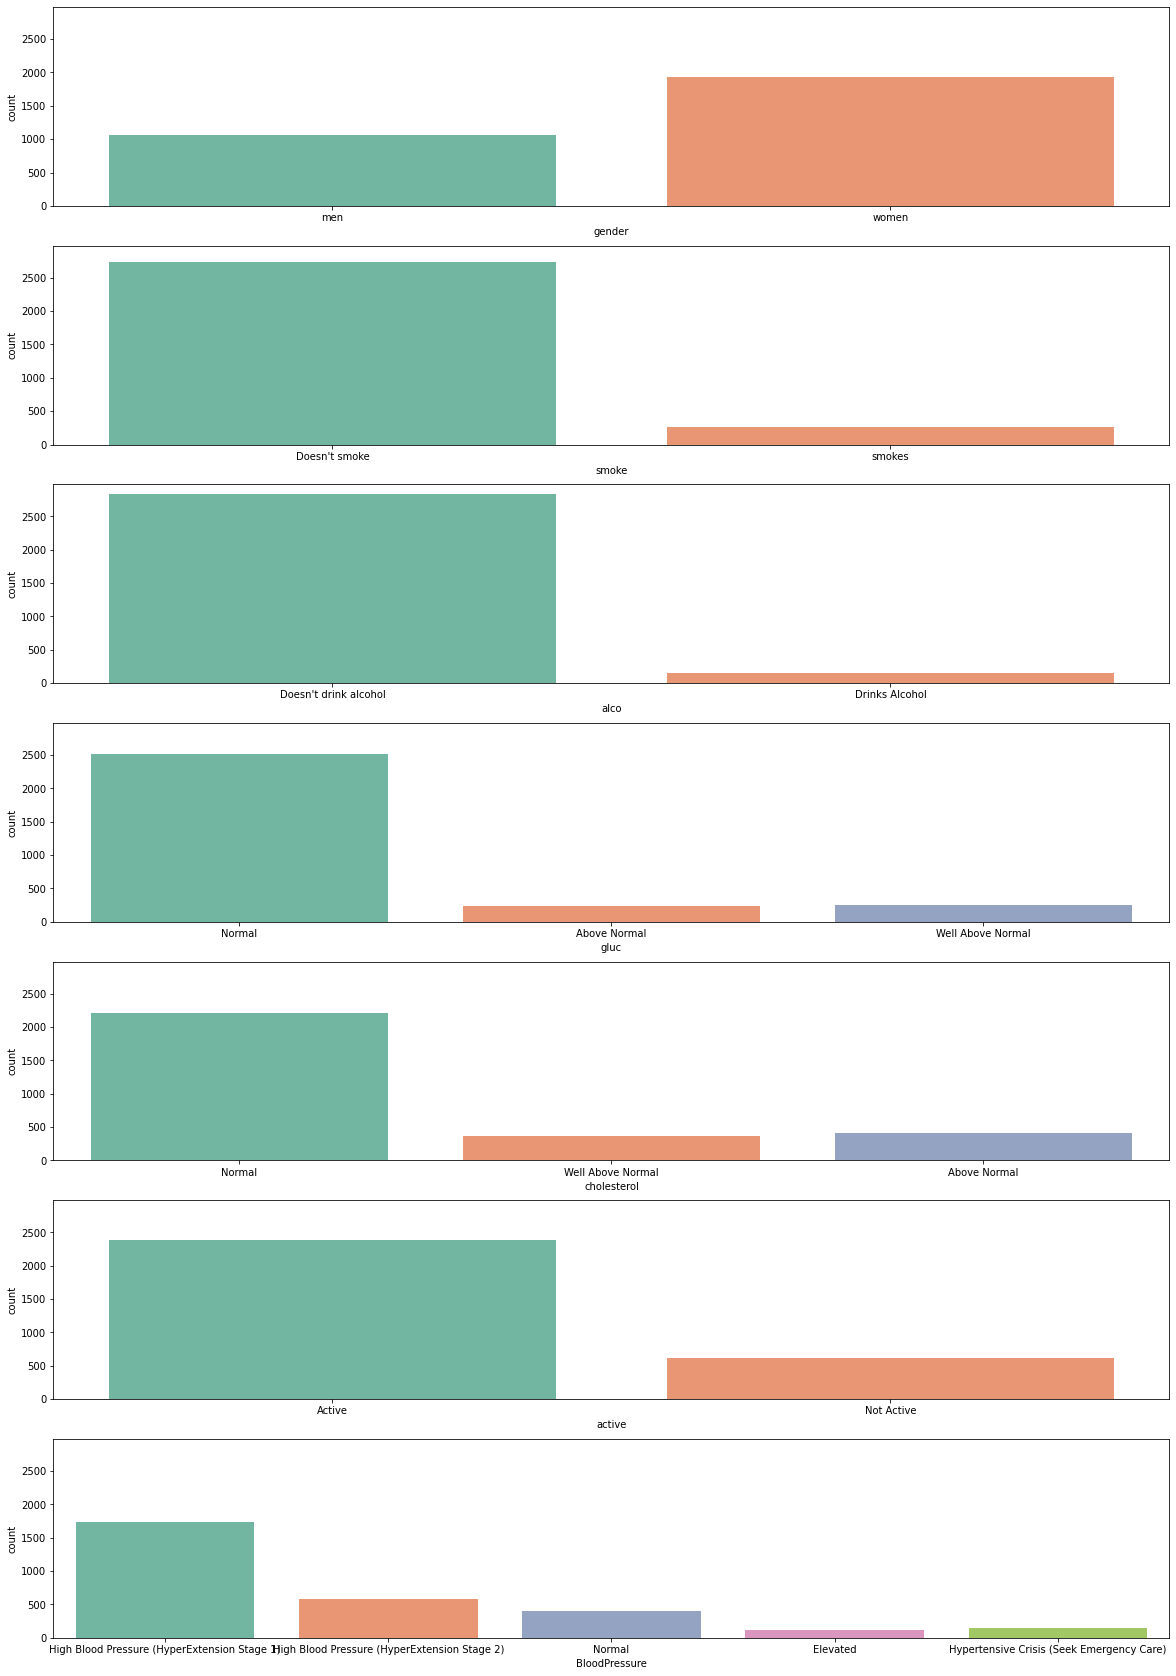

In [55]:
f, axes = plt.subplots(7 ,figsize=(20, 30), sharex=False,sharey=True)
sns.countplot(x='gender',data=dfWithActualValues,ax=axes[0],palette="Set2")
sns.countplot(x='smoke',data=dfWithActualValues,ax=axes[1],palette="Set2")
sns.countplot(x='alco',data=dfWithActualValues,ax=axes[2],palette="Set2")
sns.countplot(x='gluc',data=dfWithActualValues,ax=axes[3],palette="Set2")
sns.countplot(x='cholesterol',data=dfWithActualValues,ax=axes[4],palette="Set2")
sns.countplot(x='active',data=dfWithActualValues,ax=axes[5],palette="Set2")
sns.countplot(x='BloodPressure',data=dfWithActualValues,ax=axes[6],palette="Set2")

C:\ANACONDA3-2019\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  import sys
C:\ANACONDA3-2019\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  del sys.path[0]


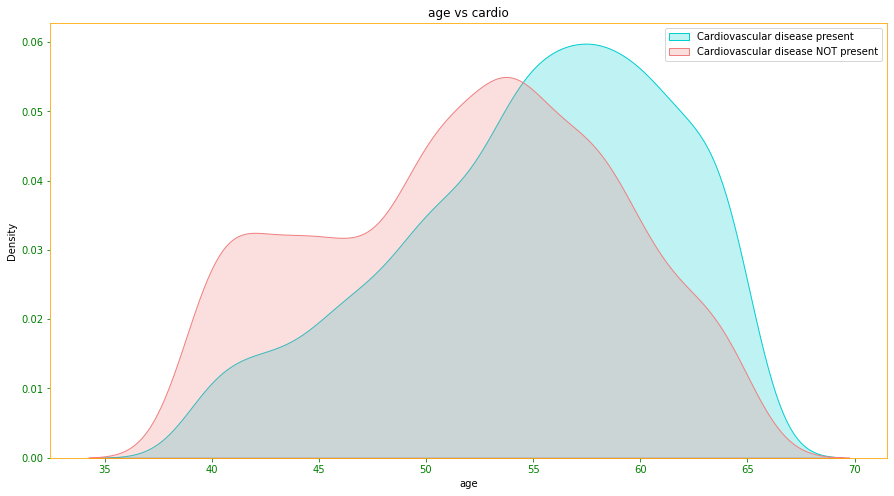

In [56]:
with plt.rc_context({'axes.edgecolor':'orange','xtick.color':'green', 'ytick.color':'green', 'figure.facecolor':'white'}):
    plt.figure(figsize=(15, 8))

    sns.kdeplot(
    df.age[df.cardio==1],
        color = 'darkturquoise',
        shade=True
    )

    sns.kdeplot(
    df.age[df.cardio==0],
    color='lightcoral',
    shade = True
    )

    plt.legend(['Cardiovascular disease present', 'Cardiovascular disease NOT present'])
    plt.title('age vs cardio')
    plt.savefig('part_e.png')
    plt.show()

C:\ANACONDA3-2019\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  import sys
C:\ANACONDA3-2019\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  del sys.path[0]


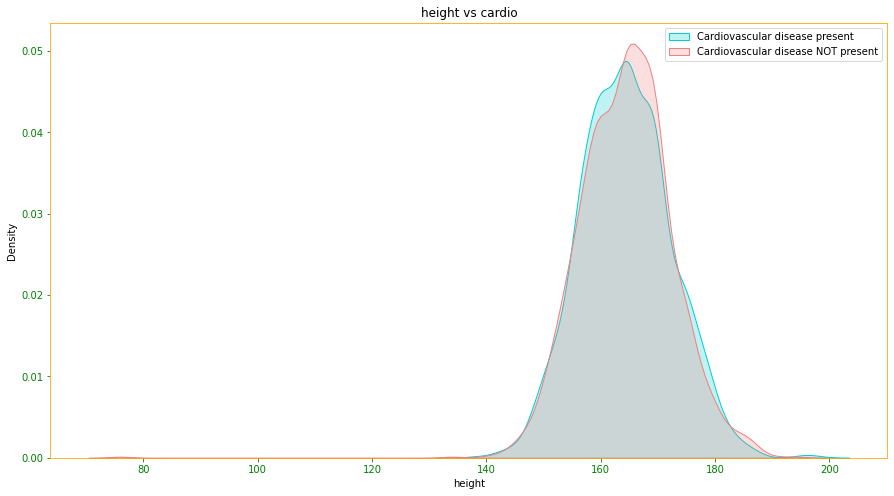

In [57]:
with plt.rc_context({'axes.edgecolor':'orange','xtick.color':'green', 'ytick.color':'green', 'figure.facecolor':'white'}):
    plt.figure(figsize=(15, 8))

    sns.kdeplot(
    df.height[df.cardio==1],
        color = 'darkturquoise',
        shade=True
    )

    sns.kdeplot(
    df.height[df.cardio==0],
    color='lightcoral',
    shade = True
    )

    plt.legend(['Cardiovascular disease present', 'Cardiovascular disease NOT present'])
    plt.title('height vs cardio')
    plt.savefig('part_e.png')
    plt.show()

C:\ANACONDA3-2019\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  import sys
C:\ANACONDA3-2019\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  del sys.path[0]


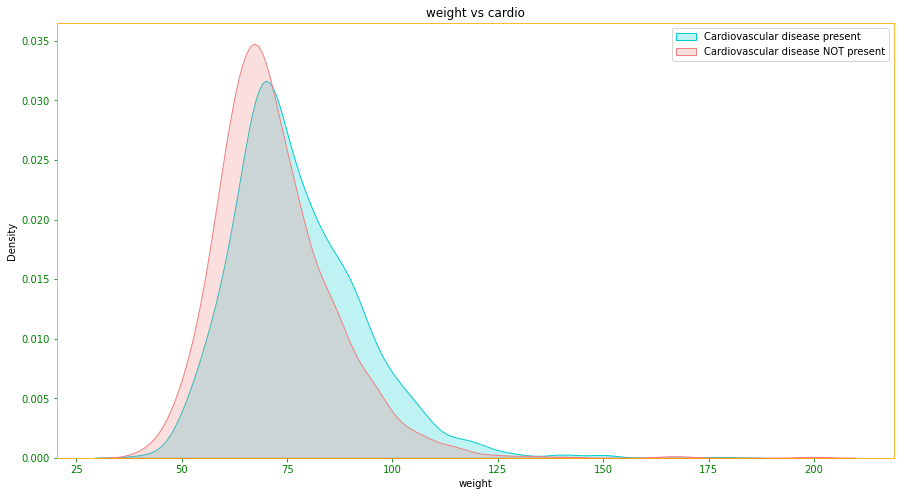

In [58]:
with plt.rc_context({'axes.edgecolor':'orange','xtick.color':'green', 'ytick.color':'green', 'figure.facecolor':'white'}):
    plt.figure(figsize=(15, 8))

    sns.kdeplot(
    df.weight[df.cardio==1],
        color = 'darkturquoise',
        shade=True
    )

    sns.kdeplot(
    df.weight[df.cardio==0],
    color='lightcoral',
    shade = True
    )

    plt.legend(['Cardiovascular disease present', 'Cardiovascular disease NOT present'])
    plt.title('weight vs cardio')
    plt.savefig('part_e.png')
    plt.show()

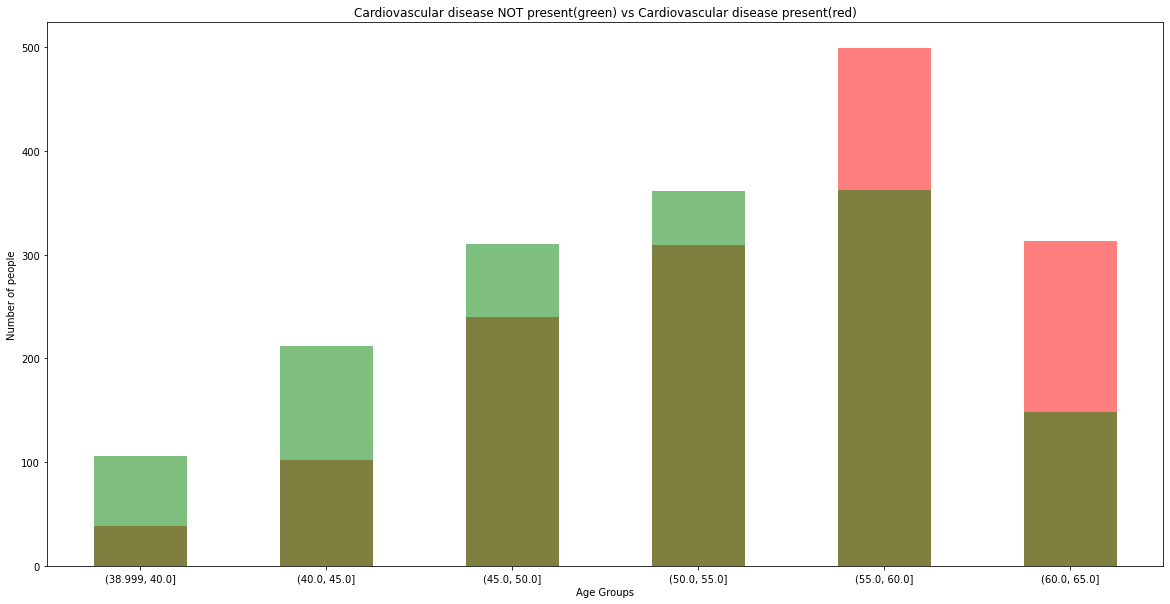

In [59]:
bins = (39,40, 45 , 50, 55, 60, 65)

df_ages = df.loc[df['cardio']==1, ['age']]

df_ages = df_ages.squeeze()

out = pd.cut(
    df_ages,
    bins = bins,
    include_lowest= True
)

ax = out.value_counts(sort=False).plot.bar(
    rot=0,
    color="red",
    figsize=(20, 10),
    alpha=0.5
)


bins = (39,40, 45 , 50, 55, 60, 65)

df_ages = df.loc[df['cardio']==0, ['age']]

df_ages = df_ages.squeeze()

out = pd.cut(
    df_ages,
    bins = bins,
    include_lowest= True
)

ax1 = out.value_counts(sort=False).plot.bar(
    rot=0,
    color="green",
    figsize=(20, 10),
    alpha=0.5
)

plt.xlabel('Age Groups')
plt.ylabel("Number of people")
plt.title("Cardiovascular disease NOT present(green) vs Cardiovascular disease present(red)")
plt.show()

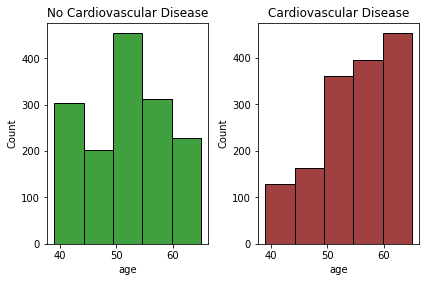

In [60]:
plt.subplot(1, 2, 1)
sns.histplot(data = df.age[df.cardio == 0], bins=5, color='green').set(title='No Cardiovascular Disease')
plt.subplot(1, 2, 2)
sns.histplot(data = df.age[df.cardio == 1], bins=5, color="maroon").set(title='Cardiovascular Disease')
plt.tight_layout(pad=1.0)

In [61]:
print(pd.crosstab(df['cardio'], df['gender']))

gender    1    2
cardio          
0       970  529
1       969  532


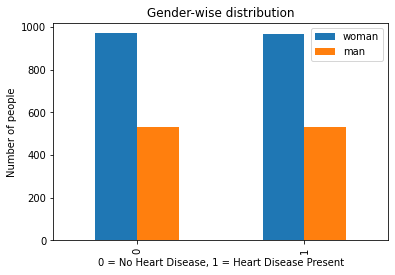

In [62]:
pd.crosstab(df['cardio'], df['gender']).plot(kind = 'bar') 
plt.xlabel('0 = No Heart Disease, 1 = Heart Disease Present')
plt.ylabel('Number of people')
plt.legend(['woman','man'])
plt.title("Gender-wise distribution")
plt.show()

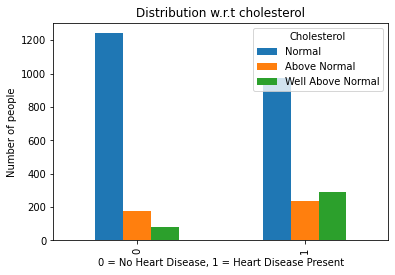

In [63]:
ax = pd.crosstab(df['cardio'], df['cholesterol']).plot(kind = 'bar',
                                                  title='Distribution w.r.t cholesterol',
                                                  xlabel='0 = No Heart Disease, 1 = Heart Disease Present',
                                                  ylabel='Number of people'
                                                 )
new_labels = [ 'Normal', 'Above Normal', 'Well Above Normal' ]
handler, _ = ax.get_legend_handles_labels()
ax.legend(handler, new_labels, loc='upper right', title='Cholesterol')

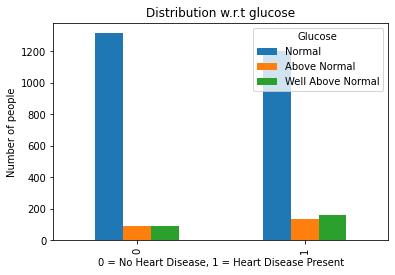

In [64]:
ax = pd.crosstab(df['cardio'], df['gluc']).plot(kind = 'bar',
                                                  title='Distribution w.r.t glucose',
                                                  xlabel='0 = No Heart Disease, 1 = Heart Disease Present',
                                                  ylabel='Number of people'
                                                 )
new_labels = ['Normal', 'Above Normal', 'Well Above Normal']
handler, _ = ax.get_legend_handles_labels()
ax.legend(handler, new_labels, loc='upper right', title='Glucose')

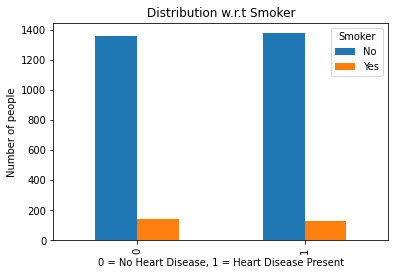

In [65]:
ax = pd.crosstab(df['cardio'], df['smoke']).plot(kind = 'bar',
                                                  title='Distribution w.r.t Smoker',
                                                  xlabel='0 = No Heart Disease, 1 = Heart Disease Present',
                                                  ylabel='Number of people'
                                                 )
new_labels = ['No', 'Yes']
handler, _ = ax.get_legend_handles_labels()
ax.legend(handler, new_labels, loc='upper right', title='Smoker')

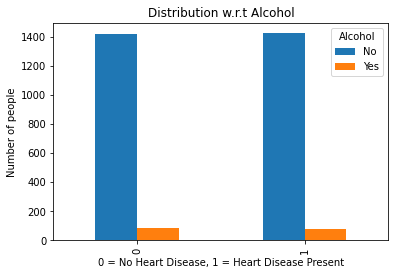

In [66]:
ax = pd.crosstab(df['cardio'], df['alco']).plot(kind = 'bar',
                                                  title='Distribution w.r.t Alcohol',
                                                  xlabel='0 = No Heart Disease, 1 = Heart Disease Present',
                                                  ylabel='Number of people'
                                                 )
new_labels = ['No', 'Yes']
handler, _ = ax.get_legend_handles_labels()
ax.legend(handler, new_labels, loc='upper right', title='Alcohol')

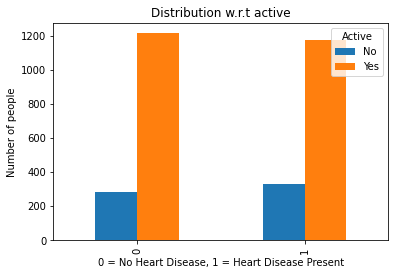

In [67]:
ax = pd.crosstab(df['cardio'], df['active']).plot(kind = 'bar',
                                                  title='Distribution w.r.t active',
                                                  xlabel='0 = No Heart Disease, 1 = Heart Disease Present',
                                                  ylabel='Number of people'
                                                 )
new_labels = ['No', 'Yes']
handler, _ = ax.get_legend_handles_labels()
ax.legend(handler, new_labels, loc='upper right', title='Active')

In [68]:
dfWithActualValues.head()

,id,age,gender,height,weight,ap_hi,ap_lo,BloodPressure,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,men,168,62.0,110,80,High Blood Pressure (HyperExtension Stage 1),Normal,Normal,Doesn't smoke,Doesn't drink alcohol,Active,0
1,1,55,women,156,85.0,140,90,High Blood Pressure (HyperExtension Stage 2),Well Above Normal,Normal,Doesn't smoke,Doesn't drink alcohol,Active,1
2,2,52,women,165,64.0,130,70,High Blood Pressure (HyperExtension Stage 1),Well Above Normal,Normal,Doesn't smoke,Doesn't drink alcohol,Not Active,1
3,3,48,men,169,82.0,150,100,High Blood Pressure (HyperExtension Stage 2),Normal,Normal,Doesn't smoke,Doesn't drink alcohol,Active,1
4,4,48,women,156,56.0,100,60,Normal,Normal,Normal,Doesn't smoke,Doesn't drink alcohol,Not Active,0


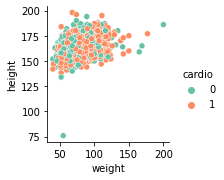

In [69]:
sns.pairplot(df, x_vars=['weight'], y_vars=['height'], hue='cardio', palette='Set2');

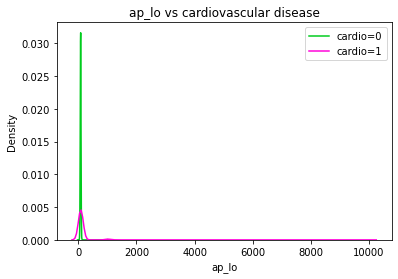

In [70]:
sns.kdeplot(df.ap_lo[df.cardio==0], color='#00cc1d')
sns.kdeplot(df.ap_lo[df.cardio==1], color='#ff02d9')
plt.title("ap_lo vs cardiovascular disease")
plt.legend(['cardio=0', 'cardio=1'])
plt.show()

<AxesSubplot:>

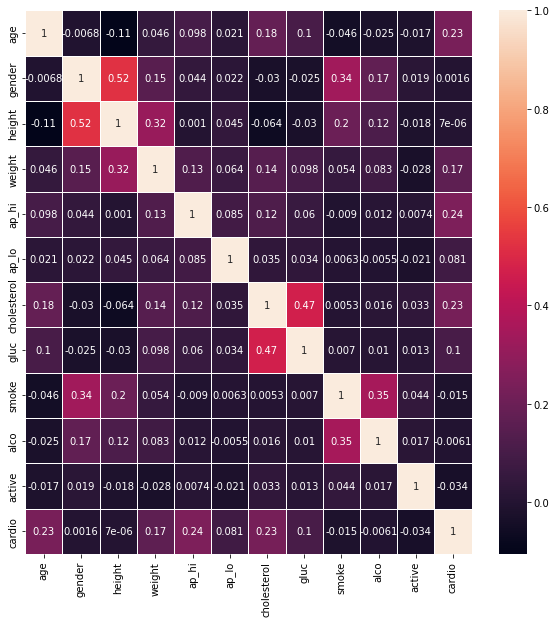

In [71]:
corr = df.iloc[:,1:13].corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [72]:
df.corr()['cardio'].sort_values(ascending=False)

cardio         1.000000
ap_hi          0.244863
age            0.231597
cholesterol    0.228346
weight         0.165636
gluc           0.102253
ap_lo          0.081366
id             0.007855
gender         0.001598
height         0.000007
alco          -0.006092
smoke         -0.015478
active        -0.034362
Name: cardio, dtype: float64

In [73]:
corr = df[['gender', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,gender,cardio
gender,1.000000,0.001598
cardio,0.001598,1.000000


In [74]:
corr = df[['height', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,height,cardio
height,1.000000,0.000007
cardio,0.000007,1.000000


In [75]:
corr = df[['weight', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,weight,cardio
weight,1.000000,0.165636
cardio,0.165636,1.000000


In [76]:
corr = df[['ap_hi', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,ap_hi,cardio
ap_hi,1.000000,0.244863
cardio,0.244863,1.000000


In [77]:
corr = df[['ap_lo', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,ap_lo,cardio
ap_lo,1.000000,0.081366
cardio,0.081366,1.000000


In [78]:
corr = df[['cholesterol', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,cholesterol,cardio
cholesterol,1.000000,0.228346
cardio,0.228346,1.000000


In [79]:
corr = df[['gluc', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,gluc,cardio
gluc,1.000000,0.102253
cardio,0.102253,1.000000


In [80]:
pearson_coef, p_value = stats.pearsonr(df['height'], df['cardio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value); 

The Pearson Correlation Coefficient is 7.013644583505528e-06  with a P-value of P = 0.999693617883746


In [81]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In [82]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

In [83]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,2118.296053,53.496130,1.350232,164.599458,73.884172,125.452399,81.025155,1.370356,1.232585,0.087074,0.054180,0.793731,0.487616
std,1215.027058,6.780902,0.477135,6.823715,11.982752,13.514280,8.106897,0.686288,0.578762,0.281998,0.226416,0.404704,0.499943
min,0.000000,39.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1066.750000,49.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,2120.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3159.250000,58.000000,2.000000,170.000000,82.000000,130.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,4228.000000,65.000000,2.000000,180.000000,108.000000,169.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
df['bmi'] = df['weight']/((df['height']/100)**2)

In [85]:
quantiles_bmi = pd.qcut(df['bmi'], 4, labels=False)
df = df.assign(bmi_Q=quantiles_bmi.values)

In [86]:
df['MAP'] = ((2* df['ap_lo']) + df['ap_hi']) / 3

In [87]:
quantiles_map = pd.qcut(df['MAP'], 4, labels=False, duplicates='drop')
df = df.assign(map_Q= quantiles_map.values)

In [88]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_Q,MAP,map_Q
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0,90.000000,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,3,106.666667,2
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0,90.000000,0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,2,116.666667,2
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0,73.333333,0


In [89]:
df_male = df.query("gender == 2")
df_female = df.query("gender == 1")
df_female.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_Q,MAP,map_Q
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,3,106.666667,2
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0,90.000000,0
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0,73.333333,0
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0,29.384676,2,93.333333,0
6,9,61,1,157,93.0,130,80,3,1,0,0,1,0,37.729725,3,96.666667,1


In [90]:
from matplotlib import rcParams

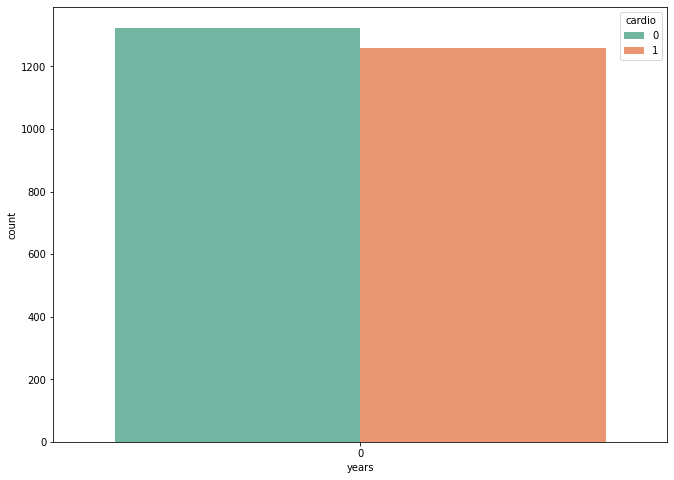

In [91]:
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

<AxesSubplot:xlabel='gender', ylabel='count'>

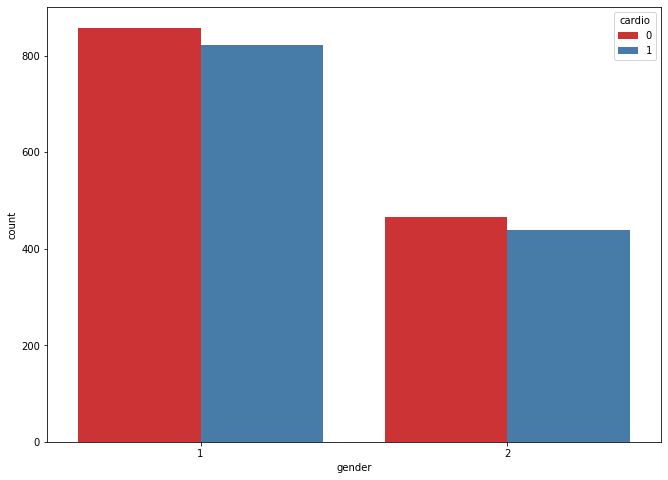

In [92]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='gender', hue='cardio', data = df, palette="Set1")

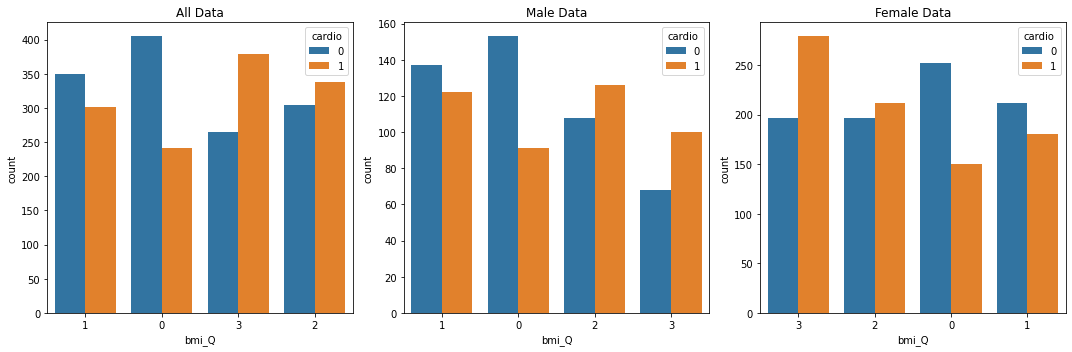

In [93]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df['bmi_Q'],order=df['bmi_Q'].value_counts().index,hue=df['cardio'],ax=axs[0])
sns.countplot(x=df_male['bmi_Q'],order=df_male['bmi_Q'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['bmi_Q'],order=df_female['bmi_Q'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

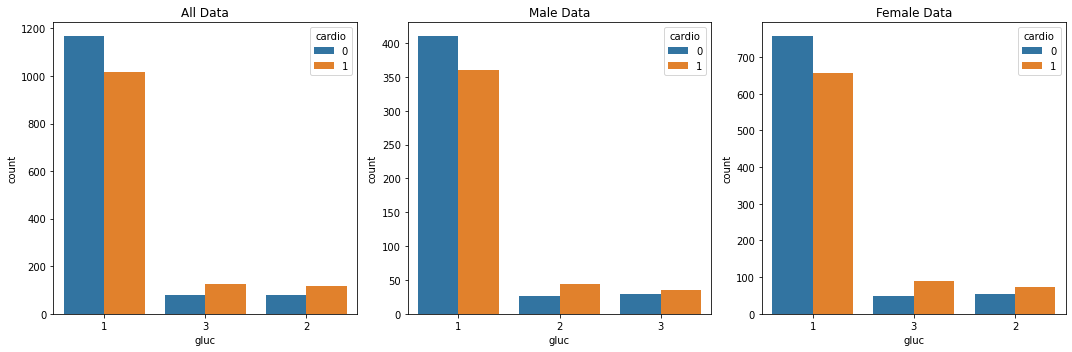

In [94]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df['gluc'],order=df['gluc'].value_counts().index,hue=df['cardio'],ax=axs[0])
sns.countplot(x=df_male['gluc'],order=df_male['gluc'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['gluc'],order=df_female['gluc'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

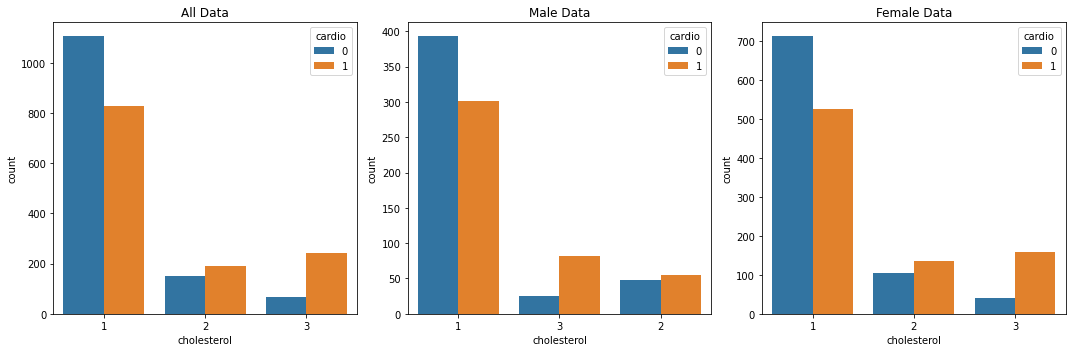

In [95]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df['cholesterol'],order=df['cholesterol'].value_counts().index,hue=df['cardio'],ax=axs[0])
sns.countplot(x=df_male['cholesterol'],order=df_male['cholesterol'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['cholesterol'],order=df_female['cholesterol'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

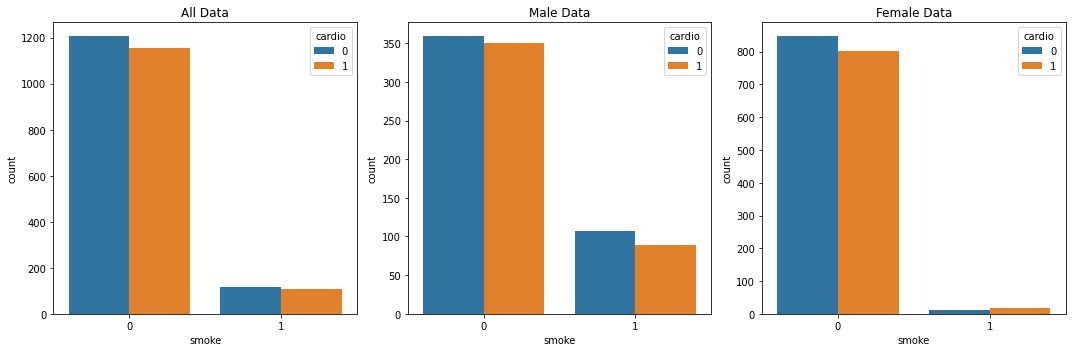

In [96]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df['smoke'],order=df['smoke'].value_counts().index,hue=df['cardio'],ax=axs[0])
sns.countplot(x=df_male['smoke'],order=df_male['smoke'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['smoke'],order=df_female['smoke'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

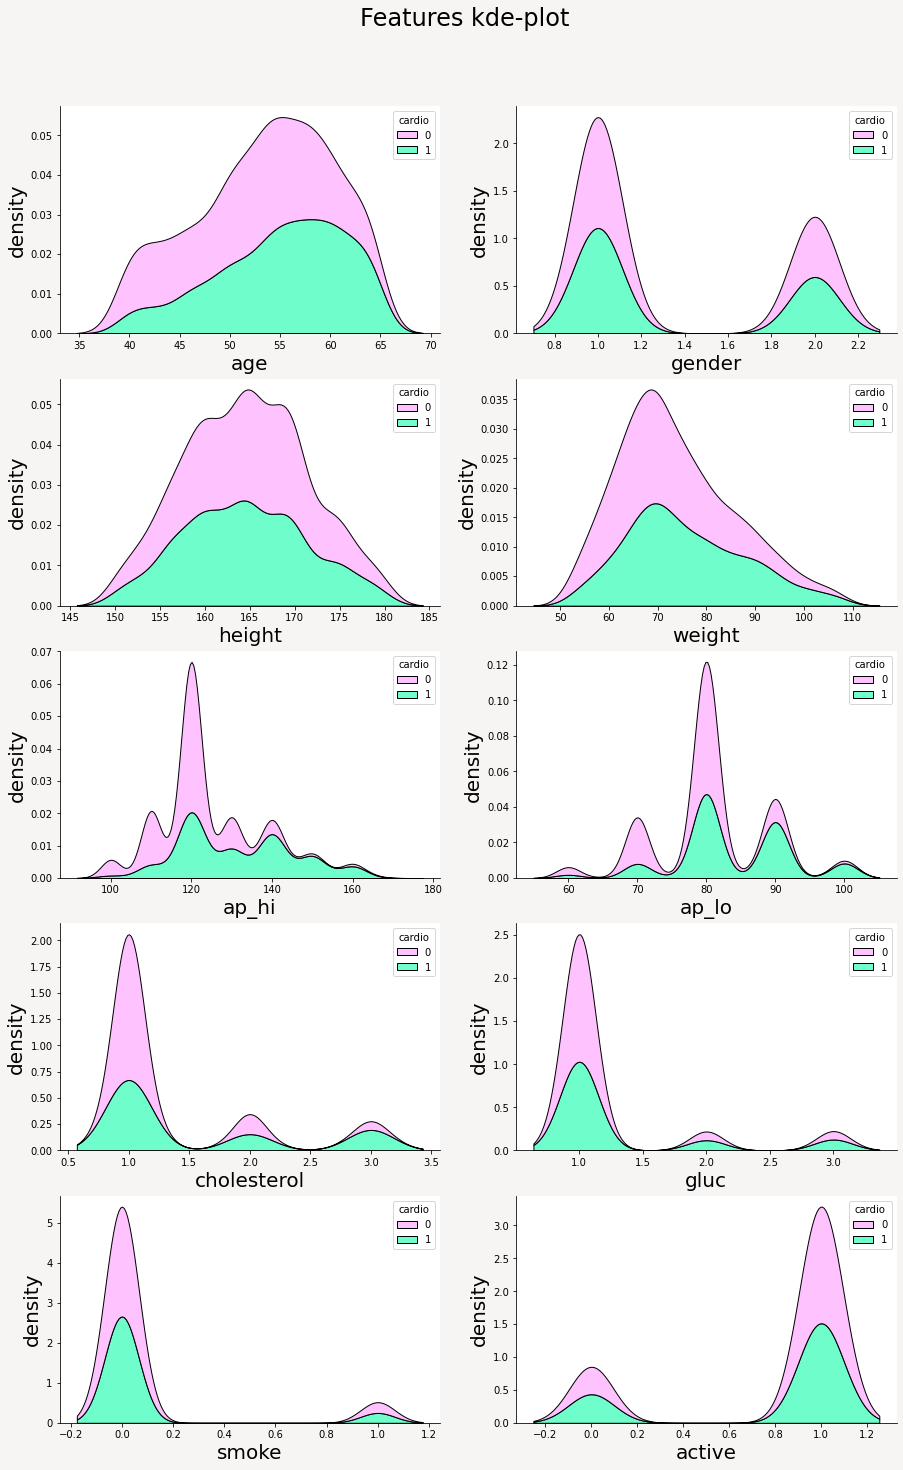

In [97]:
num_feats = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol','gluc','smoke','active']
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))

fig, ax = plt.subplots(nrow, ncol, figsize=(15, 23),facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i)
    
    ax = sns.kdeplot(data=df, x=col, hue="cardio", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    i = i +1
plt.suptitle('Features kde-plot' ,fontsize = 24);

0

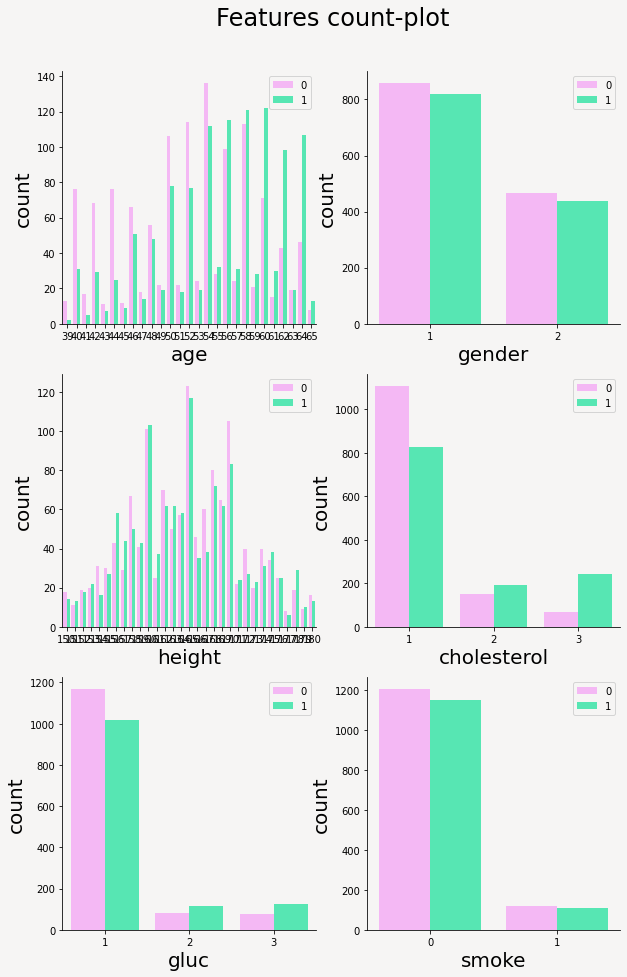

In [98]:
num = ['age', 'gender', 'height','cholesterol','gluc','smoke','active']
def hist_plot(df, num):    
    L = len(num)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(10, 15), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in num:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        g = sns.countplot(data=df, x=col, hue="cardio", palette=mypal[1::4])
        g.set_xlabel(col, fontsize=20)
        g.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        i = i +1

    plt.suptitle('Features count-plot' ,fontsize = 24)
    return 0

hist_plot(df, num[0:-1])

In [99]:
df = df.sample(frac=1).reset_index(drop=True)

In [100]:
df.drop('id', axis=1, inplace=True)

In [101]:
X = df.drop('cardio', axis=1)
y = df.cardio

In [102]:
print("Shape of X is :", X.shape, "Shape of y is :", y.shape)

Shape of X is : (2584, 16) Shape of y is : (2584,)


In [103]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_Q,MAP,map_Q,years
0,47,1,172,74.0,120,80,1,1,0,0,1,0,25.013521,1,93.333333,0,0
1,48,1,158,74.0,140,90,1,1,0,0,0,1,29.642685,2,106.666667,2,0
2,44,1,165,69.0,120,77,1,1,0,0,1,1,25.344353,1,91.333333,0,0
3,42,2,165,59.0,110,70,1,1,1,0,1,1,21.671258,0,83.333333,0,0
4,57,1,154,70.0,130,90,1,1,0,0,1,0,29.515939,2,103.333333,1,0


In [104]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
rfc = RandomForestClassifier() 

In [106]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyper_params = dict(n_estimators = n_estimators, 
                    max_depth = max_depth,  
                    min_samples_split = min_samples_split, 
                    min_samples_leaf = min_samples_leaf)

In [107]:
grid_s_cv = GridSearchCV(rfc, hyper_params, cv=3)
grid_s_cv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 300, 500, 800, 1200]})

In [108]:
grid_s_cv.best_params_

{'max_depth': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 100,
 'n_estimators': 100}

In [109]:
rfc_hyp = RandomForestClassifier() 
rfc_hyp.fit(x_train, y_train)

RandomForestClassifier()

In [110]:
rfc_predicted = rfc_hyp.predict(x_test)

In [111]:
print(classification_report(y_test, rfc_predicted))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       265
           1       0.67      0.61      0.64       252

    accuracy                           0.66       517
   macro avg       0.66      0.66      0.66       517
weighted avg       0.66      0.66      0.66       517



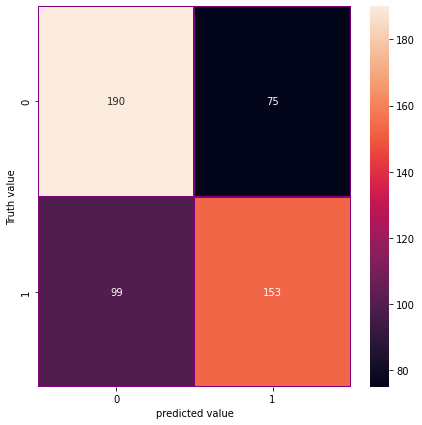

In [112]:
cm = confusion_matrix(y_test, rfc_predicted)
plt.figure(figsize=(7,7))
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='purple')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()

In [113]:
xgb = XGBClassifier()

In [114]:
hyperparameter_grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth':[2, 3, 5, 10, 15],
    'learning_rate':[0.05,0.1,0.15,0.20],
    'min_child_weight':[1,2,3,4],
    'booster':['gbtree','gblinear'],
    'base_score':[0.25,0.5,0.75,1]
    }

In [115]:
random_cv = RandomizedSearchCV(estimator=xgb,
            param_distributions=hyperparameter_grid,
            cv=3, 
            n_iter=50,
            scoring = 'neg_mean_absolute_error',
            n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [116]:
random_cv.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[11:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ANACONDA3-2019\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ANACONDA3-2019\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ANACONDA3-2019\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py", line 1261, in fit
    callbacks=callbacks,
  File "C:\ANACONDA3-2019\lib\site-packages\xgboost\training.py", line 196, in train
    early_stopping_rounds

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=50, n_jobs=4,
            

In [117]:
random_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [118]:
xgb_hyp = XGBClassifier()
xgb_hyp.fit(x_train, y_train)

[11:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
xgb_predicted = xgb_hyp.predict(x_test)

In [120]:
print(classification_report(y_test, xgb_predicted))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       265
           1       0.67      0.62      0.65       252

    accuracy                           0.67       517
   macro avg       0.67      0.67      0.67       517
weighted avg       0.67      0.67      0.67       517



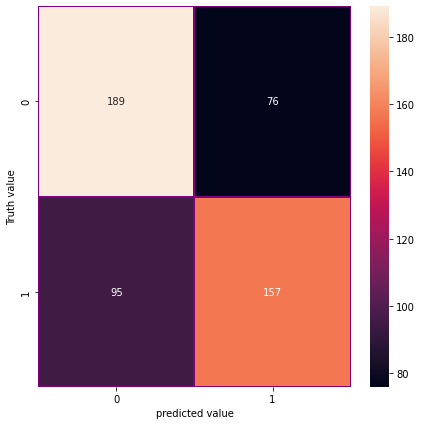

In [121]:
cm = confusion_matrix(y_test, xgb_predicted)
plt.figure(figsize=(7,7))
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='purple')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()

In [122]:
xgb_cvs = XGBClassifier()
cvs = cross_val_score(xgb_cvs, X, y, cv=5)
cvs

[11:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBC

[11:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.68665377, 0.66344294, 0.7098646 , 0.68665377, 0.67635659])

In [123]:
cvs.mean()

0.6845943352375812

In [124]:
lgbmc = LGBMClassifier()

In [125]:
def learning_rate_010_decay_power_099(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

In [126]:
def learning_rate_010_decay_power_0995(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.995, current_iter)
    return lr if lr > 1e-3 else 1e-3

In [127]:
def learning_rate_005_decay_power_099(current_iter):
    base_learning_rate = 0.05
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

In [128]:
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(x_test, y_test)],
            'eval_names': ['valid'],
            'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [129]:
from scipy.stats import randint as sp_randint

In [130]:
from scipy.stats import uniform as sp_uniform

In [131]:
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [132]:
lgbmc = LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)

In [133]:
gs = RandomizedSearchCV(
                        estimator=lgbmc, 
                        param_distributions=param_test, 
                        n_iter=100,
                        scoring='roc_auc',
                        cv=3,
                        refit=True,
                        random_state=314,
                        verbose=True)

In [134]:
opt_parameters = {'colsample_bytree': 0.9234, 'min_child_samples': 399, 'min_child_weight': 0.1, 'num_leaves': 13, 'reg_alpha': 2, 'reg_lambda': 5, 'subsample': 0.855}

In [135]:
clf_sw = LGBMClassifier(**lgbmc.get_params())

In [136]:
clf_sw.set_params(**opt_parameters)

LGBMClassifier(colsample_bytree=0.9234, metric='None', min_child_samples=399,
               min_child_weight=0.1, n_estimators=5000, n_jobs=4, num_leaves=13,
               random_state=314, reg_alpha=2, reg_lambda=5, silent=True,
               subsample=0.855)

In [137]:
gs_sample_weight = GridSearchCV(estimator=clf_sw, 
                                param_grid={'scale_pos_weight':[1,2,6,12]},
                                scoring='roc_auc',
                                cv=5,
                                refit=True,
                                verbose=True)

In [138]:
gs_sample_weight.fit(x_train, y_train, **fit_params)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[100]	valid's auc: 0.748824


C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of Ligh

C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of Ligh

[100]	valid's auc: 0.751804
[100]	valid's auc: 0.760729


GridSearchCV(cv=5,
             estimator=LGBMClassifier(colsample_bytree=0.9234, metric='None',
                                      min_child_samples=399,
                                      min_child_weight=0.1, n_estimators=5000,
                                      n_jobs=4, num_leaves=13, random_state=314,
                                      reg_alpha=2, reg_lambda=5, silent=True,
                                      subsample=0.855),
             param_grid={'scale_pos_weight': [1, 2, 6, 12]}, scoring='roc_auc',
             verbose=True)

In [139]:
print('Best score reached: {} with params: {} '.format(gs_sample_weight.best_score_, gs_sample_weight.best_params_))

Best score reached: 0.7746355507970422 with params: {'scale_pos_weight': 2} 


In [140]:
gs_sample_weight.cv_results_

{'mean_fit_time': array([0.03360181, 0.03124423, 0.02933431, 0.0320611 ]),
 'std_fit_time': array([0.02056338, 0.00436024, 0.00290609, 0.01004119]),
 'mean_score_time': array([0.00106654, 0.        , 0.00117931, 0.00124083]),
 'std_score_time': array([0.00130766, 0.        , 0.00151051, 0.00132332]),
 'param_scale_pos_weight': masked_array(data=[1, 2, 6, 12],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'scale_pos_weight': 1},
  {'scale_pos_weight': 2},
  {'scale_pos_weight': 6},
  {'scale_pos_weight': 12}],
 'split0_test_score': array([0.76230618, 0.76074164, 0.76173407, 0.76098683]),
 'split1_test_score': array([0.76053148, 0.76660284, 0.76357883, 0.76049645]),
 'split2_test_score': array([0.78080569, 0.78525175, 0.78494674, 0.78302285]),
 'split3_test_score': array([0.77325636, 0.7751103 , 0.77743359, 0.77723411]),
 'split4_test_score': array([0.78242044, 0.78547123, 0.78534216, 0.78419225]),
 'mean_test_score': ar

In [141]:
print("Valid+-Std     Train  :   Parameters")
for i in np.argsort(gs_sample_weight.cv_results_['mean_test_score'])[-5:]:
    print('{1:.3f}+-{3:.3f}     {2:.3f}   :  {0}'.format(gs_sample_weight.cv_results_['params'][i], 
                                                         gs_sample_weight.cv_results_['mean_test_score'][i], 
                                                         gs_sample_weight.cv_results_['rank_test_score'][i],
                                                         gs_sample_weight.cv_results_['std_test_score'][i]))

Valid+-Std     Train  :   Parameters
0.772+-0.009     4.000   :  {'scale_pos_weight': 1}
0.773+-0.010     3.000   :  {'scale_pos_weight': 12}
0.775+-0.010     2.000   :  {'scale_pos_weight': 6}
0.775+-0.010     1.000   :  {'scale_pos_weight': 2}


In [142]:
lgbmc_hyp = LGBMClassifier(**lgbmc.get_params())
lgbmc_hyp.set_params(**opt_parameters)

LGBMClassifier(colsample_bytree=0.9234, metric='None', min_child_samples=399,
               min_child_weight=0.1, n_estimators=5000, n_jobs=4, num_leaves=13,
               random_state=314, reg_alpha=2, reg_lambda=5, silent=True,
               subsample=0.855)

In [143]:
lgbmc_hyp.fit(x_train, y_train, **fit_params)

[100]	valid's auc: 0.759958


C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of Ligh

LGBMClassifier(colsample_bytree=0.9234, metric='None', min_child_samples=399,
               min_child_weight=0.1, n_estimators=5000, n_jobs=4, num_leaves=13,
               random_state=314, reg_alpha=2, reg_lambda=5, silent=True,
               subsample=0.855)

In [144]:
lgbmc_predicted = lgbmc_hyp.predict(x_test)

In [145]:
print(classification_report(y_test, lgbmc_predicted))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71       265
           1       0.71      0.63      0.66       252

    accuracy                           0.69       517
   macro avg       0.69      0.69      0.69       517
weighted avg       0.69      0.69      0.69       517



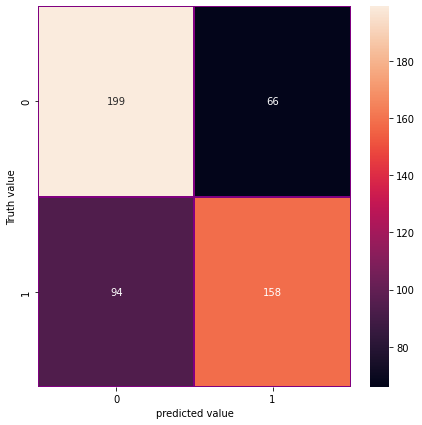

In [146]:
cm = confusion_matrix(y_test, lgbmc_predicted)
plt.figure(figsize=(7,7))
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='purple')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()

In [147]:
vot_cls = VotingClassifier(estimators=[('lr', rfc_hyp), ('rf', xgb_hyp), ('ab', lgbmc_hyp)], voting='hard')

In [148]:
for clf, label in zip([rfc_hyp, xgb_hyp, lgbmc_hyp, vot_cls],
                      ['Random forest classifier', 'XGBClassifier', "LGBM classifier", "Ensemble"]):
    scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"% (scores.mean(), scores.std(), label))
    

Accuracy: 0.69 (+/- 0.03) [Random forest classifier]
[11:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBC

[11:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[11:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.69 (+/- 0.04) [XGBClassifier]


C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ANACONDA3-2019\lib\site-packages\lightgbm\s

Accuracy: 0.70 (+/- 0.03) [LGBM classifier]


C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[11:12:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[11:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[11:12:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[11:12:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[11:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[11:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[11:12:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[11:12:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[11:12:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[11:12:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.70 (+/- 0.03) [Ensemble]


In [149]:
vot_cls.fit(x_train, y_train)
train_acc = round(vot_cls.score(x_train, y_train)*100, 2) 
train_acc

C:\ANACONDA3-2019\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ANACONDA3-2019\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[11:12:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


96.76

In [150]:
test_acc = round(vot_cls.score(x_test, y_test)*100, 2)

In [151]:
test_acc

67.7

In [152]:
def create_model():
    model = Sequential()
    model.add(Dense(14, input_dim=16, activation='relu'))
    model.add(Dense(50, activation='relu', kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1), bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu', kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1), bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu', kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1), bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [153]:
model = create_model()

In [154]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                238       
                                                                 
 dense_1 (Dense)             (None, 50)                750       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0

In [155]:
optimizer = RMSprop(learning_rate=0.002)

In [156]:
model.compile(loss='binary_crossentropy', 
              metrics=['accuracy'], 
              optimizer=optimizer)

In [157]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=50, verbose=1,mode="auto", min_delta=0.0001, cooldown=0,min_lr=0.00001)

In [158]:
early_stopping = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=400, 
                   restore_best_weights=True)

In [159]:
history = model.fit(x_train, y_train.values,
                    batch_size=1024, 
                    epochs=1000,
                    verbose=0,
                    validation_split=0.15,
                    callbacks=[learning_rate_reduction, early_stopping],
                    shuffle=True)


Epoch 00250: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 00300: ReduceLROnPlateau reducing learning rate to 2.0000000949949027e-05.

Epoch 00350: ReduceLROnPlateau reducing learning rate to 1e-05.
Restoring model weights from the end of the best epoch: 200.
Epoch 00600: early stopping


In [160]:
model.evaluate(x_test, y_test.values, verbose=2)

17/17 - 0s - loss: 0.5918 - accuracy: 0.7002 - 29ms/epoch - 2ms/step


[0.5918089747428894, 0.7001934051513672]

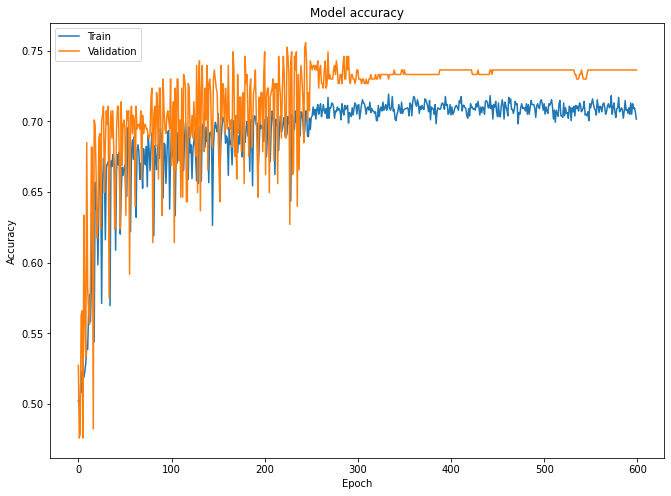

In [161]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

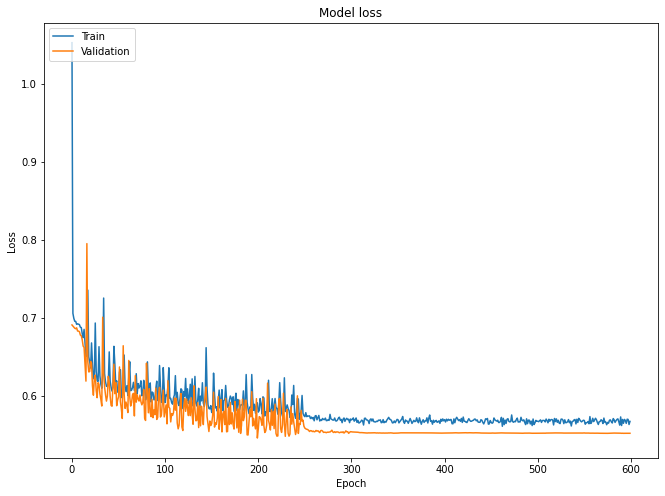

In [162]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()